<a href="https://colab.research.google.com/github/mavischi/titanic-data-science/blob/main/Project_01_Titanic_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 環境準備：載入套件

In [2]:
import pandas as pd
import numpy as np

## 載入資料：觀察資料

In [10]:
url = 'https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv'
df = pd.read_csv(url)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


特質欄位的定義：

> Data Link: https://www.kaggle.com/competitions/titanic/data

PassengerId 乘客ID<br>
Survived 存活<br>
Pclass 等級<br>
Name 名字<br>
Sex 性別<br>
Age 年紀<br>
SibSp 一同登船的兄弟姐妹/ 配偶<br>
Parch 一同登船的父母小孩<br>
Ticket 票號<br>
Fare 費用<br>
Cabin 房間號碼<br>
Embarked 登船港口

<Axes: >

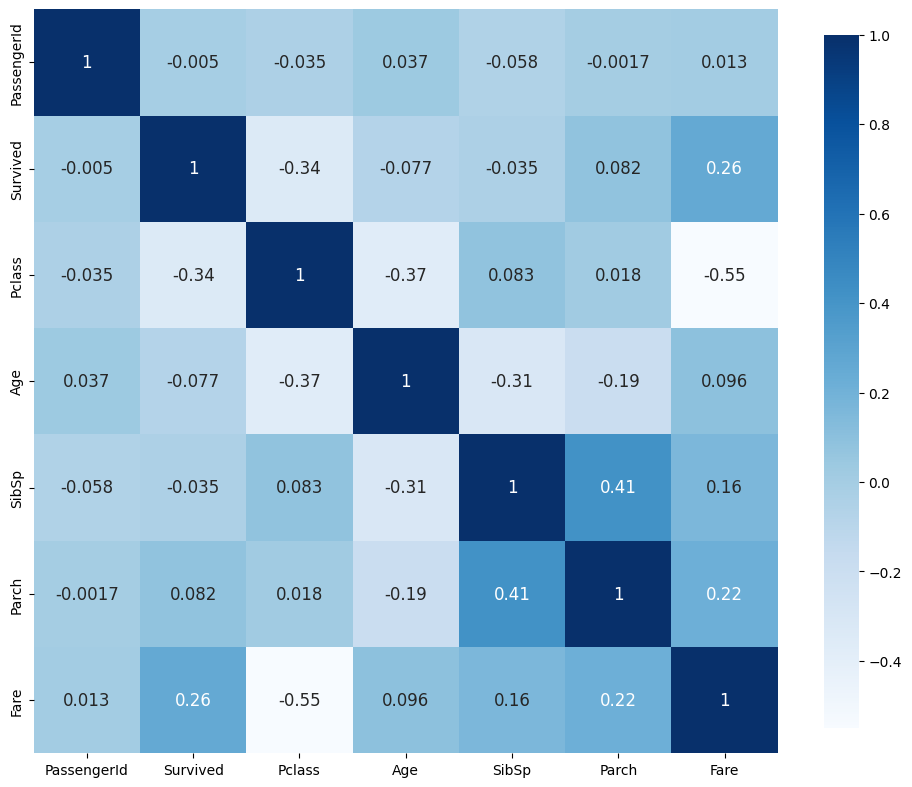

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(
        corr,
        cmap = 'Blues',
        square=True,
        cbar_kws={ 'shrink' : .9 },
        ax = plt.subplots( figsize =( 12 , 10 ) )[1],
        annot = True,
        annot_kws = { 'fontsize' : 12 }
)

透過初步的熱圖，可以看出 Survived 與 Fare 有較高的正相關



## 進一步觀察特徵與生存間的關係

繪製 2 * 3 的子圖，方便觀察特徵間的差異



/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

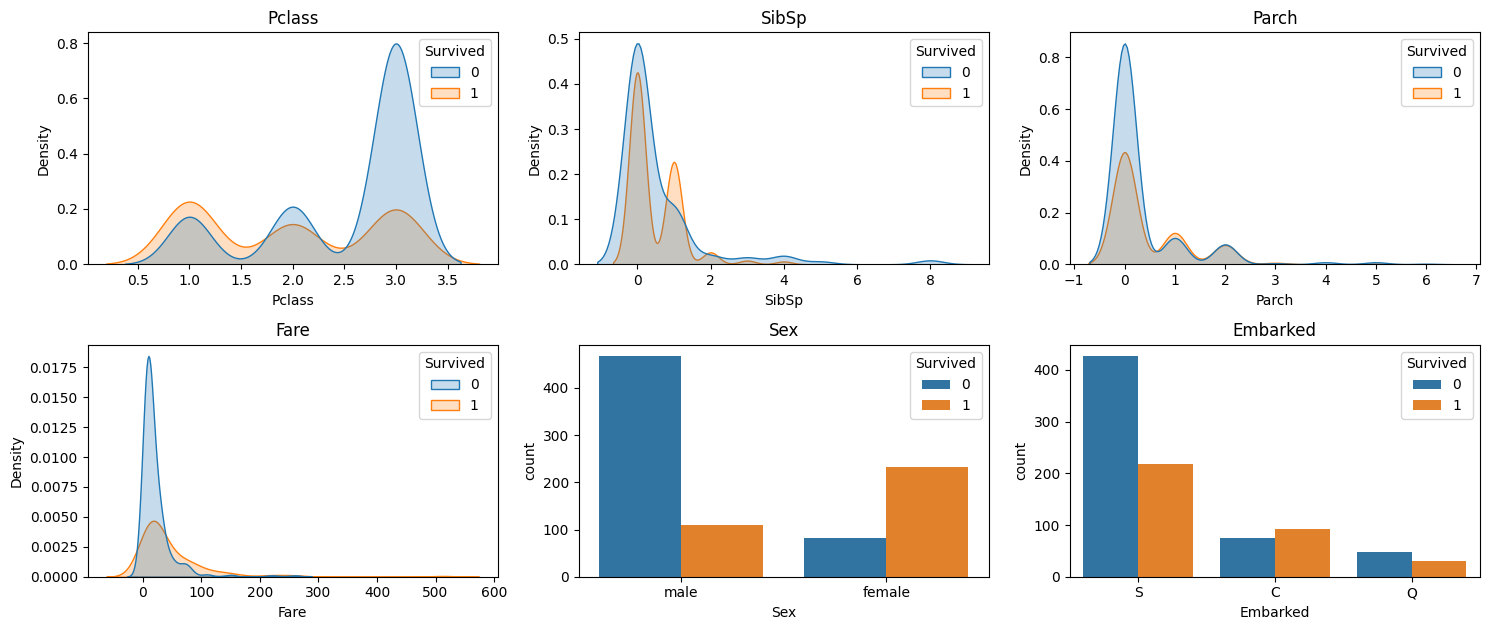

In [42]:
cols = ['Pclass', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']
n_rows = 2
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 3.2))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r * n_cols + c
        if i < 6:
            ax = axs[r][c]
            if df[cols[i]].dtype in ['float64', 'int64']:  # 如果是數值型資料，繪製 KDE 曲線
                sns.kdeplot(x=df[cols[i]], hue=df['Survived'], ax=ax, fill=True)
                ax.set_title(cols[i])
                plt.legend(title='Survived', labels=[0, 1], loc='upper right')
            else:  # 否則使用 countplot 繪製條形圖
                sns.countplot(x=df[cols[i]], hue=df['Survived'], ax=ax)
                ax.set_title(cols[i])
                ax.legend(title='Survived', loc='upper right')
plt.tight_layout()
plt.show()

## 清理資料

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 處理空值

In [48]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna('None')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 轉換型態

In [50]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [51]:
sex_encoding = {'male':0, 'female':1}
df['Sex'] = df['Sex'].map(lambda d: sex_encoding[d])

In [54]:
df_Embarked = pd.get_dummies(df['Embarked'], prefix='Embarked_', dtype='int')
df_Embarked

,Embarked__C,Embarked__None,Embarked__Q,Embarked__S
0,0,0,0,1
1,1,0,0,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
886,0,0,0,1
887,0,0,0,1
888,0,0,0,1
889,1,0,0,0


In [55]:
df = df.join(df_Embarked)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked__C,Embarked__None,Embarked__Q,Embarked__S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,NaN,S,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C,1,0,0,0


## 特徵工程

In [62]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked__C,Embarked__None,Embarked__Q,Embarked__S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,0,0,1


### 取出頭銜
在100年前的英國的年代，頭銜對於搭上救生艇的順序也許也有影響，因此將名字的頭銜取出，並減少類別進行分類

In [78]:
df['TitleRow'] = df["Name"].map(lambda name: name.split(',')[1].split('.')[0].strip())
df['TitleRow'].unique()
title_cat = {
    'Mr': 'Mr',
    'Mrs': 'Mrs',
    'Miss': 'Miss',
    'Master': 'Master',
    'Don': 'Royalty',
    'Rev': 'Officer',
    'Dr': 'Officer',
    'Mme': 'Mrs',
    'Ms': 'Mrs',
    'Major': 'Officer',
    'Lady': 'Miss',
    'Sir': 'Royalty',
    'Mlle': 'Miss',
    'Col': 'Officer',
    'Capt': 'Officer',
    'the Countess': 'Royalty',
    'Jonkheer': 'Royalty'
}

df['Title'] = df['Title Row'].map(title_cat)
df['Title']

,Title
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
...,...
886,Officer
887,Miss
888,Miss
889,Mr


In [79]:
df_title = pd.get_dummies(df['Title'], prefix='Title_', dtype='int')
df_title

,Title__Master,Title__Miss,Title__Mr,Title__Mrs,Title__Officer,Title__Royalty
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
886,0,0,0,0,1,0
887,0,1,0,0,0,0
888,0,1,0,0,0,0
889,0,0,1,0,0,0


In [91]:
df = df.join(df_title)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked__C,Embarked__None,Embarked__Q,Embarked__S,Title,Title__Master,Title__Miss,Title__Mr,Title__Mrs,Title__Officer,Title__Royalty,TitleRow,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,0,1,Mr,0,0,1,0,0,0,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,0,Mrs,0,0,0,1,0,0,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0,1,Miss,0,1,0,0,0,0,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,Mrs,0,0,0,1,0,0,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,0,0,1,Mr,0,0,1,0,0,0,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S,0,0,0,1,Officer,0,0,0,0,1,0,Rev,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S,0,0,0,1,Miss,0,1,0,0,0,0,Miss,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,NaN,S,0,0,0,1,Miss,0,1,0,0,0,0,Miss,4
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C,1,0,0,0,Mr,0,0,1,0,0,0,Mr,1


### 合併 SibSp 與 Parch 計算家族共遊人數

In [83]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['FamilySize']

,FamilySize
0,2
1,2
2,1
3,2
4,1
...,...
886,1
887,1
888,4
889,1


<Axes: >

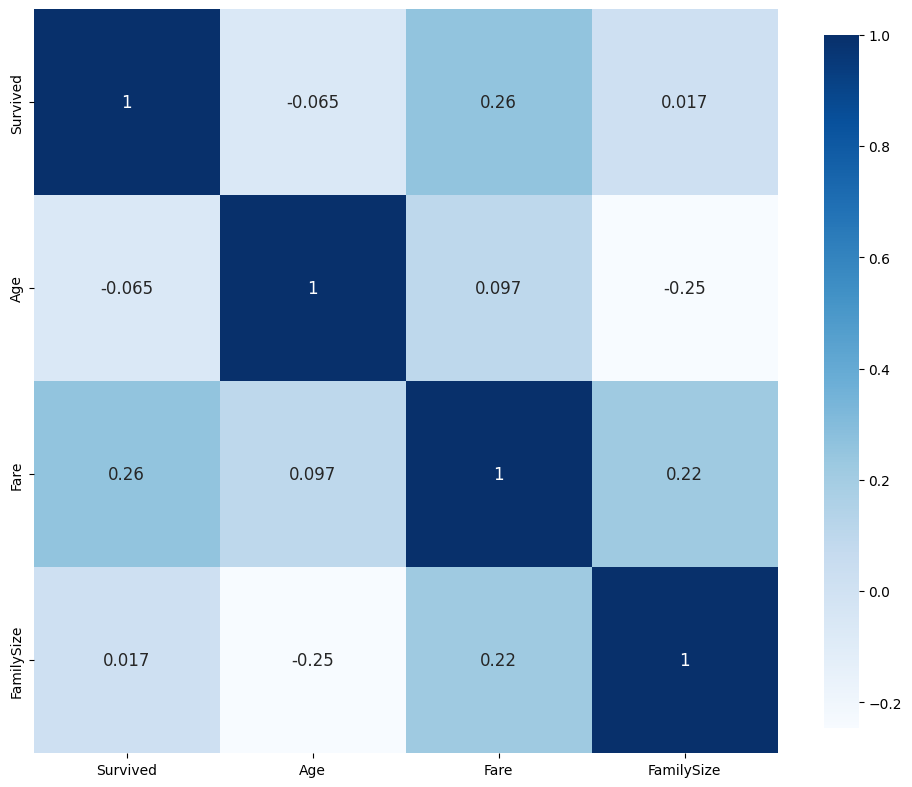

In [87]:
corr = df[['Survived', 'Age', 'Fare', 'FamilySize']].corr()
sns.heatmap(
        corr,
        cmap = 'Blues',
        square=True,
        cbar_kws={ 'shrink' : .9 },
        ax = plt.subplots( figsize =( 12 , 10 ))[1],
        annot = True,
        annot_kws = { 'fontsize' : 12 }
)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


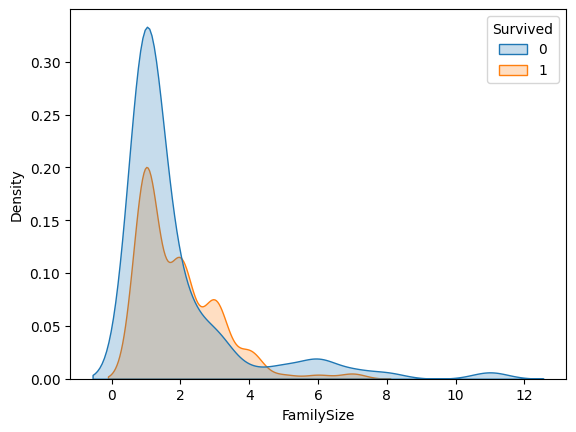

In [89]:
sns.kdeplot(x=df['FamilySize'], hue=df['Survived'], fill=True)
plt.show()

In [95]:
df['Family_Single'] = df['FamilySize'].map(lambda s: 1 if s == 1 else 0)
df['Family_Small'] = df['FamilySize'].map(lambda s:1 if 2 <= s <= 4 else 0)
df['Family_Large'] = df['FamilySize'].map(lambda s:1 if 5 <= s else 0)

def FamilySizeTransform(s):
  if s >= 1 and s <= 3:
    return 3
  if s >=4 and s <= 6:
    return 2
  return 1

df['FamilyEncoding'] = df["FamilySize"].map(FamilySizeTransform)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked__C,Embarked__None,Embarked__Q,Embarked__S,Title,Title__Master,Title__Miss,Title__Mr,Title__Mrs,Title__Officer,Title__Royalty,TitleRow,FamilySize,Family_Single,Family_Small,Family_Large,FamilyEncoding
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,0,1,Mr,0,0,1,0,0,0,Mr,2,0,1,0,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,0,Mrs,0,0,0,1,0,0,Mrs,2,0,1,0,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0,1,Miss,0,1,0,0,0,0,Miss,1,1,0,0,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,Mrs,0,0,0,1,0,0,Mrs,2,0,1,0,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,0,0,1,Mr,0,0,1,0,0,0,Mr,1,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S,0,0,0,1,Officer,0,0,0,0,1,0,Rev,1,1,0,0,3
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S,0,0,0,1,Miss,0,1,0,0,0,0,Miss,1,1,0,0,3
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,NaN,S,0,0,0,1,Miss,0,1,0,0,0,0,Miss,4,0,1,0,2
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C,1,0,0,0,Mr,0,0,1,0,0,0,Mr,1,1,0,0,3


## 模型分析

第一次 Baseline 結果

In [108]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Embarked__C',
       'Embarked__None', 'Embarked__Q', 'Embarked__S', 'Title',
       'Title__Master', 'Title__Miss', 'Title__Mr', 'Title__Mrs',
       'Title__Officer', 'Title__Royalty', 'TitleRow', 'FamilySize',
       'Family_Single', 'Family_Small', 'Family_Large', 'FamilyEncoding'],
      dtype='object')

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

columns_X = ['Pclass', 'Sex', 'Age', 'Fare',
             'SibSp', 'Parch',
             'Embarked__C', 'Embarked__None', 'Embarked__Q', 'Embarked__S']
columns_y = ['Survived']

X_train = df[columns_X]
y_train = df[columns_y]

log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, X_train, y_train.values.ravel(), cv=5, scoring='accuracy')
print(scores)
print('Baseline的平均準確度:', scores.mean())

[0.77653631 0.78651685 0.78651685 0.76966292 0.8258427 ]
Baseline的平均準確度: 0.7890151277383717


加入頭銜進行準確度計算

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

columns_X = ['Pclass', 'Sex', 'Age', 'Fare',
             'SibSp', 'Parch',
             'Embarked__C', 'Embarked__None', 'Embarked__Q', 'Embarked__S',
             'Title__Master', 'Title__Miss', 'Title__Mr', 'Title__Mrs', 'Title__Officer', 'Title__Royalty']
columns_y = ['Survived']

X_train = df[columns_X]
y_train = df[columns_y]

log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, X_train, y_train.values.ravel(), cv=5, scoring='accuracy')
print(scores)
print('加入頭銜後的平均準確度:', scores.mean())

[0.83240223 0.82022472 0.80337079 0.79775281 0.86516854]
加入頭銜後的平均準確度: 0.8237838177138912


將同行家屬加總並區分家庭大小，進行準確度計算

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

columns_X = ['Pclass', 'Sex', 'Age', 'Fare',
             'FamilyEncoding',
             'Embarked__C', 'Embarked__None', 'Embarked__Q', 'Embarked__S',
             'Title__Master', 'Title__Miss', 'Title__Mr', 'Title__Mrs', 'Title__Officer', 'Title__Royalty']
columns_y = ['Survived']

X_train = df[columns_X]
y_train = df[columns_y]

log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, X_train, y_train.values.ravel(), cv=5, scoring='accuracy')
print(scores)
print('分類家庭大小後的平均準確度:', scores.mean())

[0.82681564 0.82022472 0.80898876 0.80898876 0.85955056]
分類家庭大小後的平均準確度: 0.824913690289373
